**Сергеев А.А.** 18-ИВТ-3  
Лабораторная работа №1  
**Вариант 2**

1. Подсчитайте количество отменённых рейсов.
2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.
4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('flights.csv')
df

e:\python\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# 1) Подсчитайте количество отменённых рейсов.

In [3]:
print('Количество отменённых рейсов: ', sum(df.CANCELLED == 1))

Количество отменённых рейсов:  89884


# 2) Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [4]:
most_cancelled = df.groupby(['ORIGIN_AIRPORT'])[['CANCELLED']].count()
most_cancelled.sort_values(by=['CANCELLED'], ascending=False)

,CANCELLED
ORIGIN_AIRPORT,
ATL,346836
ORD,285884
DFW,239551
DEN,196055
LAX,194673
...,...
13964,1
14025,1
14222,1


Аэропорт, рейсы которого отменяются наиболее часто: ATL

# 3) Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
dayCoder = pd.Series(label_encoder.fit_transform(df['DAY_OF_WEEK']))
pears = pearsonr(dayCoder, df.CANCELLED)
spear = spearmanr(dayCoder, df.CANCELLED)
print('Отмена рейса - день недели')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
def pValue(spear):
    if spear[1] < 0.05:
        print('p-value is good')
    else:
        print('p-value is not good')
pValue(spear)

Отмена рейса - день недели
Коэффициент Пирсона:  (-0.022230160330561584, 0.0)
Коэффициент Спирмана:  SpearmanrResult(correlation=-0.022767803841691137, pvalue=0.0)
p-value is good


In [7]:
label_encoder = LabelEncoder()
monthCoder = pd.Series(label_encoder.fit_transform(df['MONTH']))
pears = pearsonr(monthCoder, df.CANCELLED)
spear = spearmanr(monthCoder, df.CANCELLED)
print('Отмена рейса - месяц')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
pValue(spear)

Отмена рейса - месяц
Коэффициент Пирсона:  (-0.05504306000967676, 0.0)
Коэффициент Спирмана:  SpearmanrResult(correlation=-0.05513296176216533, pvalue=0.0)
p-value is good


In [8]:
label_encoder = LabelEncoder()
airlineCoder = pd.Series(label_encoder.fit_transform(df.AIRLINE))
pears = pearsonr(airlineCoder, df.CANCELLED)
spear = spearmanr(airlineCoder, df.CANCELLED)
print('Отмена рейса - авиакомпания')
print('Коэффициент Пирсона: ', pears)
print('Коэффициент Спирмана: ', spear)
pValue(spear)

Отмена рейса - авиакомпания
Коэффициент Пирсона:  (0.004359972463787866, 7.174621546185745e-26)
Коэффициент Спирмана:  SpearmanrResult(correlation=0.005096167837688236, pvalue=9.82297746120727e-35)
p-value is good


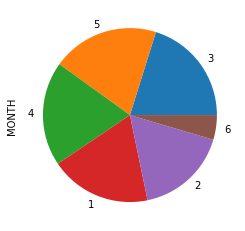

In [9]:
df_plot = df.head(2500000)
df_plot['MONTH'].value_counts().plot.pie()

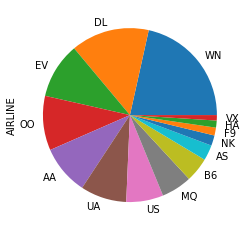

In [10]:
df_plot['AIRLINE'].value_counts().plot.pie()

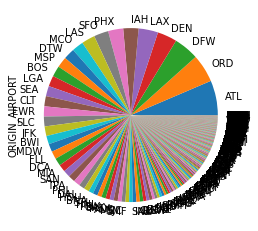

In [11]:
df_plot['ORIGIN_AIRPORT'].value_counts().plot.pie()

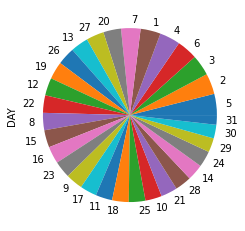

In [12]:
df_plot['DAY'].value_counts().plot.pie()

# 4) Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [13]:
print('Аэропорт WN:')
print('Рейсов: ',df[df.AIRLINE == 'WN'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'WN')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'WN')].shape[0])

Аэропорт WN:
Рейсов:  1261855
Отмененных рейсов:  16043
Перенаправленных рейсов:  3409


In [14]:
print('Аэропорт EV:')
print('Рейсов: ',df[df.AIRLINE == 'EV'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'EV')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'EV')].shape[0])

Аэропорт EV:
Рейсов:  571977
Отмененных рейсов:  15231
Перенаправленных рейсов:  1994


In [15]:
print('Аэропорт DL:')
print('Рейсов: ',df[df.AIRLINE == 'DL'].shape[0])
print('Отмененных рейсов: ',df[(df.CANCELLED == 1) & (df.AIRLINE == 'DL')].shape[0])
print('Перенаправленных рейсов: ',df[(df.DIVERTED == 1) & (df.AIRLINE == 'DL')].shape[0])

Аэропорт DL:
Рейсов:  875881
Отмененных рейсов:  3824
Перенаправленных рейсов:  1782


# 5) Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [16]:
df['FLIGHT_SPEED'] = df['DISTANCE']/df['AIR_TIME']
speed_df = df[['AIRLINE', 'FLIGHT_SPEED']]
speed_df

,AIRLINE,FLIGHT_SPEED
0,AS,8.568047
1,AA,8.859316
2,US,8.631579
3,AA,9.077519
4,AS,7.276382
...,...,...
5819074,B6,9.599265
5819075,B6,8.292308
5819076,B6,8.111675
5819077,B6,8.256944


In [17]:
avg_df = speed_df.groupby(['AIRLINE'])['FLIGHT_SPEED'].mean()
avg_df.head(3)

AIRLINE
AA    7.127989
AS    7.258512
B6    6.992831
Name: FLIGHT_SPEED, dtype: float64

# 6) Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [18]:
import seaborn as sns

In [19]:
frequency = df[['ORIGIN_AIRPORT', 'DAY', 'CANCELLED']]
frequency

,ORIGIN_AIRPORT,DAY,CANCELLED
0,ANC,1,0
1,LAX,1,0
2,SFO,1,0
3,LAX,1,0
4,SEA,1,0
...,...,...,...
5819074,LAX,31,0
5819075,JFK,31,0
5819076,JFK,31,0
5819077,MCO,31,0


In [20]:
frequency_MCO = frequency[frequency['ORIGIN_AIRPORT'] == 'MCO']
frequency_MCO = frequency_MCO.groupby(['DAY'])[['CANCELLED']].count()
frequency_MCO

,CANCELLED
DAY,
1,3648
2,3675
3,3629
4,3676
5,3653
6,3639
7,3696
8,3659
9,3602


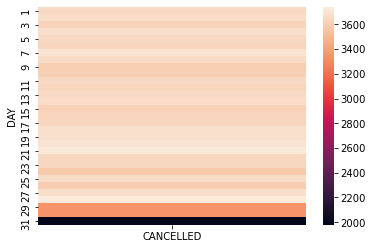

In [21]:
sns.heatmap(frequency_MCO)

In [22]:
frequency_SFO = frequency[frequency['ORIGIN_AIRPORT'] == 'SFO']
frequency_SFO = frequency_SFO.groupby(['DAY'])[['CANCELLED']].count()
frequency_SFO

,CANCELLED
DAY,
1,4832
2,4982
3,4862
4,4856
5,4835
6,4842
7,4722
8,4918
9,4930


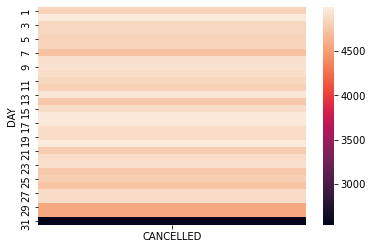

In [23]:
sns.heatmap(frequency_SFO)

# 7) Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [37]:
delay_MCO = df[df['ORIGIN_AIRPORT']=='MCO']
delay_MCO = delay_MCO[['DEPARTURE_DELAY']]

Задержка отправки из аэропорта MCO:


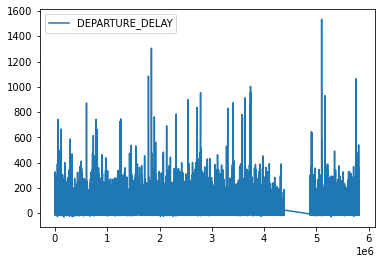

In [38]:
print('Задержка отправки из аэропорта MCO:')
delay_MCO.plot()

Задержка прибытия в аэропорт MCO:


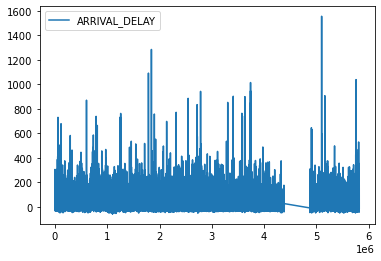

In [44]:
delay_MCO = df[df['ORIGIN_AIRPORT']=='MCO']
delay_MCO = delay_MCO[['ARRIVAL_DELAY']]
print('Задержка прибытия в аэропорт MCO:')
delay_MCO.plot()

Задержка отправки из аэропорта JFK:


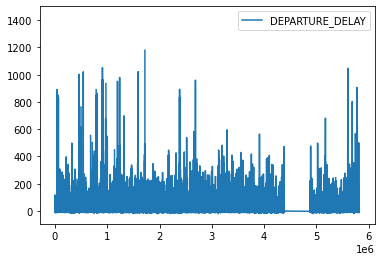

In [41]:
delay_JFK = df[df['ORIGIN_AIRPORT'] == 'JFK']
delay_JFK = delay_JFK[['DEPARTURE_DELAY']]
print('Задержка отправки из аэропорта JFK:')
delay_JFK.plot()

Задержка прибытия в аэропорт JFK:


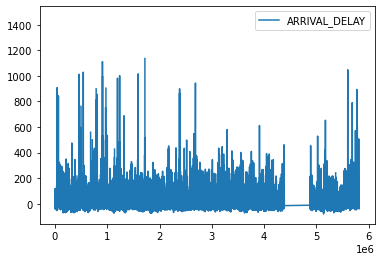

In [45]:
delay_JFK = df[df['ORIGIN_AIRPORT'] == 'JFK']
delay_JFK = delay_JFK[['ARRIVAL_DELAY']]
print('Задержка прибытия в аэропорт JFK:')
delay_JFK.plot()

Задержка отправки из аэропорта SFO:


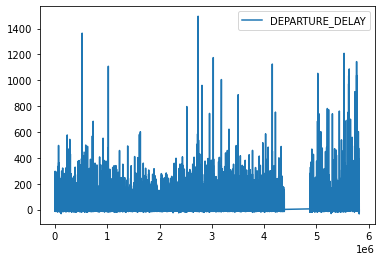

In [46]:
delay_SFO = df[df['ORIGIN_AIRPORT'] == 'SFO']
delay_SFO = delay_SFO[['DEPARTURE_DELAY']]
print('Задержка отправки из аэропорта SFO:')
delay_SFO.plot()

Задержка прибытия в аэропорт SFO:


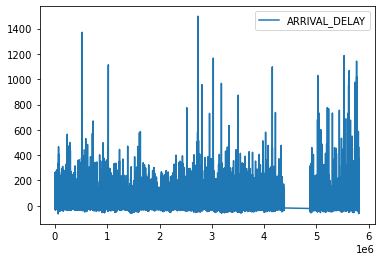

In [47]:
delay_SFO = df[df['ORIGIN_AIRPORT'] == 'SFO']
delay_SFO = delay_SFO[['ARRIVAL_DELAY']]
print('Задержка прибытия в аэропорт SFO:')
delay_SFO.plot()

# 8) Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

In [58]:
reasons = df[['ORIGIN_AIRPORT', 'CANCELLATION_REASON']]

In [68]:
reasons_MCO = reasons[reasons.ORIGIN_AIRPORT == 'MCO']
reasons_MCO = reasons_MCO['CANCELLATION_REASON'].dropna()
reasons_MCO

213        B
26278      A
32547      A
35912      A
40014      A
          ..
5795321    B
5795567    A
5796165    B
5796585    B
5802116    B
Name: CANCELLATION_REASON, Length: 1118, dtype: object

Причины задержки аэропорта MCO


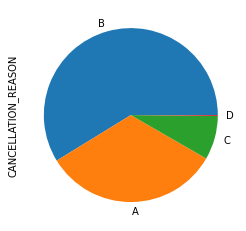

In [74]:
print('Причины задержки аэропорта MCO')
reasons_MCO.value_counts().plot.pie()

In [72]:
reasons_SFO = reasons[reasons.ORIGIN_AIRPORT == 'SFO']
reasons_SFO = reasons_SFO['CANCELLATION_REASON'].dropna()
reasons_SFO

214        B
13949      B
19320      A
33781      B
36500      A
          ..
5803619    B
5805737    B
5807163    A
5810838    A
5818157    A
Name: CANCELLATION_REASON, Length: 2148, dtype: object

Причины задержки аэропорта SFO


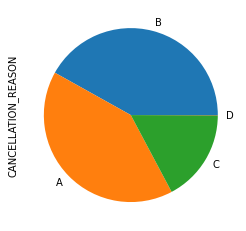

In [75]:
print('Причины задержки аэропорта SFO')
reasons_SFO.value_counts().plot.pie()

In [76]:
reasons_JFK = reasons[reasons.ORIGIN_AIRPORT == 'JFK']
reasons_JFK = reasons_JFK['CANCELLATION_REASON'].dropna()
reasons_JFK

9870       A
39859      B
44283      B
49004      A
57192      C
          ..
5769236    B
5769237    B
5775322    B
5776493    B
5794196    B
Name: CANCELLATION_REASON, Length: 1922, dtype: object

Причины задержки аэропорта JFK


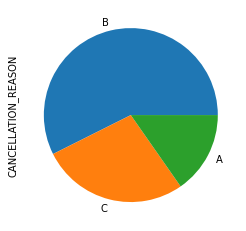

In [77]:
print('Причины задержки аэропорта JFK')
reasons_JFK.value_counts().plot.pie()

# 9) Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [81]:
max_arrival = df.groupby(['AIRLINE'])[['ARRIVAL_DELAY']].max()
max_arrival = max_arrival.sort_values(by=['ARRIVAL_DELAY'], ascending=False)

In [83]:
print('Максимальная задержка по прибытию:')
max_arrival.head(1)

Максимальная задержка по прибытию:


,ARRIVAL_DELAY
AIRLINE,
AA,1971.0


In [85]:
max_departure = df.groupby(['AIRLINE'])[['DEPARTURE_DELAY']].max()
max_departure = max_departure.sort_values(by=['DEPARTURE_DELAY'], ascending=False)

In [86]:
print('Максимальная задержка по отправке:')
max_departure.head(1)

Максимальная задержка по отправке:


,DEPARTURE_DELAY
AIRLINE,
AA,1988.0
